# WALMART SALES FORECAST

# Problem Statement :


A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply. You are a data scientist, who has to
come up with useful insights using the data and make prediction models to forecast the sales for
X number of months/years. 




# Project Objective :


Our Main Objective is to predict sales of store in a week. As in dataset size and time related data are given as feature, so analyze if sales are impacted by time-based factors and space- based factor.

By using given data we have to Predict the walmart sales forecasting based on different parameters




# Dataset Information :

You are provided with historical sales data for 45 Walmart stores located in different regions. Each store contains a number of departments, and you are tasked with predicting the department-wide sales for each store.


The basic idea of analyzing the Walmart Forecasting dataset is to get a fair idea about the factors affecting the Sales of the Walmart Store.

Where;



Store	    :   Store number

Date	    :   Week of Sales

Weekly_Sales:	Sales for the given store in that week

Holiday_Flag:	If it is a holiday week

Temperature :	Temperature on the day of the sale

Fuel_Price  :	Cost of the fuel in the region

CPI	Consumer:   Price Index

Unemployment:	Unemployment Rate



# IMPORT LIBRARIES


Import data:

In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
data=pd.read_csv('Walmart (1).csv')
data.head()


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Understanding the data


# Data preprocessing:

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


The datatype of 'Date' Column is object which suppose to be datetime64.

This dataset doesn't contain any null values

converting datatype by pd.to_datetime

In [16]:
data['Date'] = pd.to_datetime(data['Date'],errors='coerce')
data.sort_values(by=['Date'],inplace=True)
data.set_index(data.Date, inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,,,
2010-01-10,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2010-01-10,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
2010-01-10,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
2010-01-10,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
2010-01-10,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476


Extracting year,month and week from date column in to separate columns and droping the 'Date' column.

To analyze sales with repected to year,month and week.

In [17]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.week
data=data.drop(columns=['Date'])
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week
Date,,,,,,,,,,
2010-01-10,5,283178.12,0,71.10,2.603,212.226946,6.768,2010,1,1
2010-01-10,15,566945.95,0,59.69,2.840,132.756800,8.067,2010,1,1
2010-01-10,42,481523.93,0,86.01,3.001,126.234600,9.003,2010,1,1
2010-01-10,33,224294.39,0,91.45,3.001,126.234600,9.265,2010,1,1
2010-01-10,36,422169.47,0,74.66,2.567,210.440443,8.476,2010,1,1


Aggregating  'max', 'min', 'mean', 'median', 'std' w.r.t  'Store' to find uselfull insights from Weekly_Sales

In [18]:
agg_data = data.groupby(['Store']).Weekly_Sales.agg(['max', 'min', 'mean', 'median', 'std']).reset_index()
agg_data.isnull().sum()

Store     0
max       0
min       0
mean      0
median    0
std       0
dtype: int64

adding agg_data to original data

In [19]:
store_data = pd.merge(left=data,right=agg_data,on=['Store'],how ='left')
store_data.dropna(inplace=True)
data = store_data.copy()
del store_data

In [21]:
#Weekly_Sales should not be zero
data=data[data['Weekly_Sales']>=0]



In [22]:
data.shape

(6435, 15)

# ANALYSIS


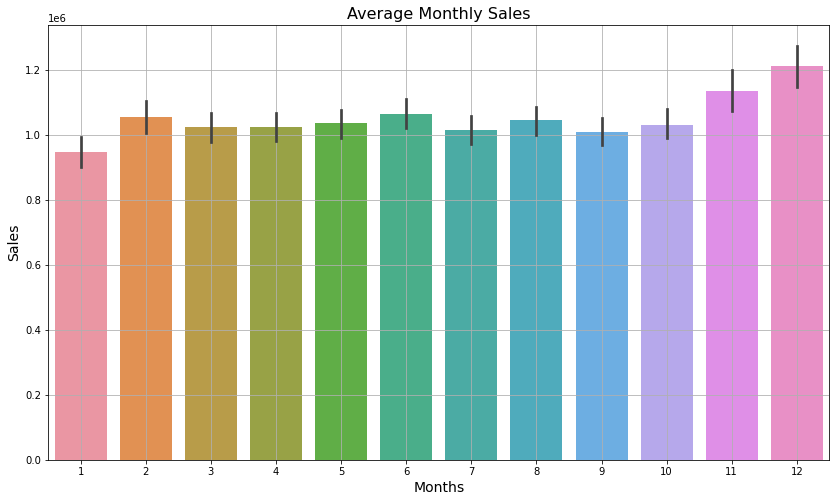

In [23]:
#Average Monthly Sales
plt.figure(figsize=(14,8))
sns.barplot(x='Month',y='Weekly_Sales',data=data)
plt.ylabel('Sales',fontsize=14)
plt.xlabel('Months',fontsize=14)
plt.title('Average Monthly Sales',fontsize=16)
plt.grid()

In [29]:
#sales of every month each year
data_monthly = pd.crosstab(data["Year"], data["Month"], values=data["Weekly_Sales"],aggfunc='sum')
data_monthly

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2010,4.223988e+07,1.915869e+08,1.862262e+08,1.838118e+08,2.806119e+08,1.424361e+08,1.842664e+08,1.845381e+08,1.797041e+08,2.311201e+08,1.587731e+08,3.235716e+08
2011,2.119657e+08,1.876092e+08,1.365205e+08,2.789693e+08,1.828017e+08,1.401936e+08,2.244611e+08,1.880810e+08,2.310323e+08,1.837193e+08,2.534703e+08,2.293760e+08
2012,1.722207e+08,1.428296e+08,2.307397e+08,1.825428e+08,1.422830e+08,2.923883e+08,1.845865e+08,1.916126e+08,1.797959e+08,1.880794e+08,4.692588e+07,4.612851e+07


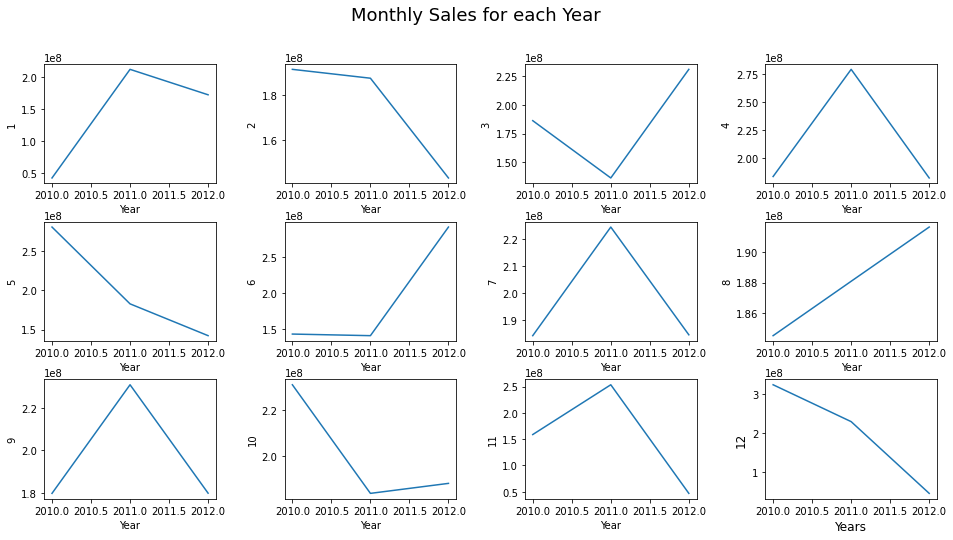

In [26]:
fig, axes = plt.subplots(3,4,figsize=(16,8))
plt.suptitle('Monthly Sales for each Year', fontsize=18)
k=1
for i in range(3):
    for j in range(4):
      sns.lineplot(ax=axes[i,j],data=data_monthly[k])
      plt.subplots_adjust(wspace=0.4,hspace=0.32)
      plt.ylabel(k,fontsize=12)
      plt.xlabel('Years',fontsize=12)
      k+=1

plt.show()
     

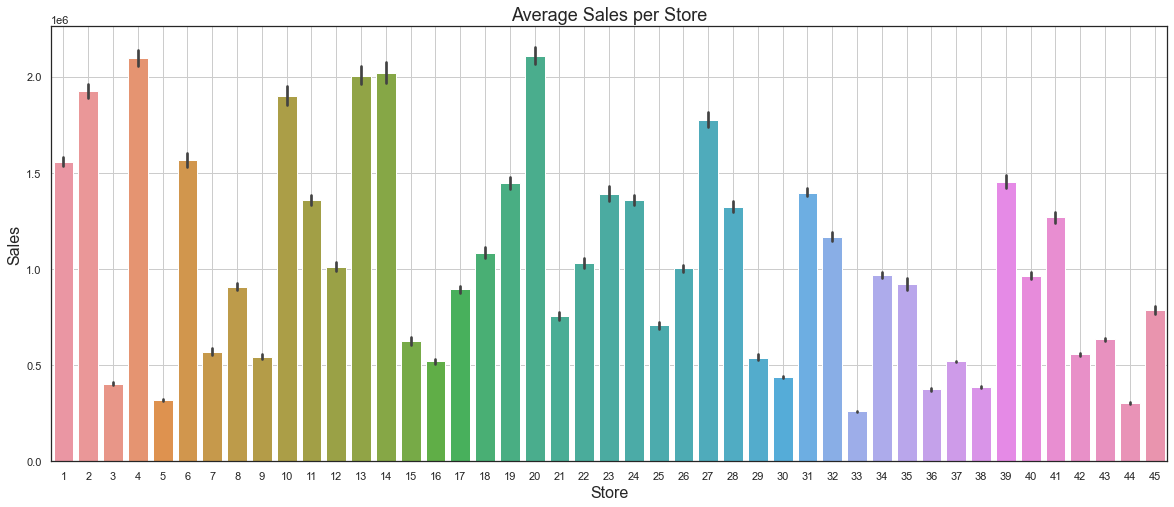

In [88]:
#Average Weekly Sales Store wise
plt.figure(figsize=(20,8))
sns.barplot(x='Store',y='Weekly_Sales',data=data)
plt.grid()
plt.title('Average Sales per Store', fontsize=18)
plt.ylabel('Sales', fontsize=16)
plt.xlabel('Store', fontsize=16)
plt.savefig('avg_sales_store.png')
plt.show()

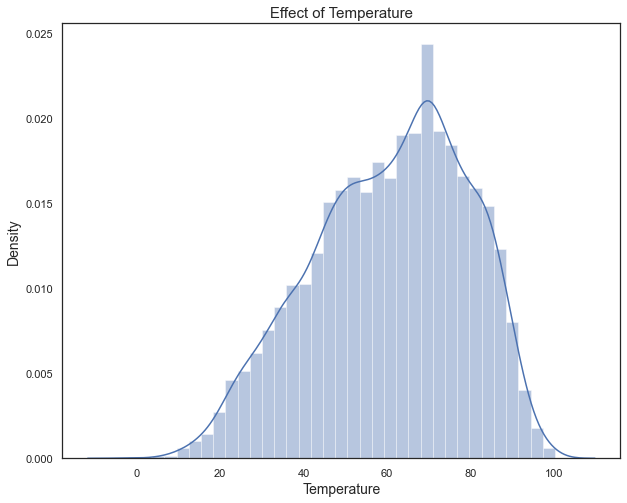

In [89]:
#distribution of temperature 
plt.figure(figsize=(10,8))
sns.distplot(data['Temperature'])
plt.title('Effect of Temperature',fontsize=15)
plt.xlabel('Temperature',fontsize=14)
plt.ylabel('Density',fontsize=14)
plt.show()

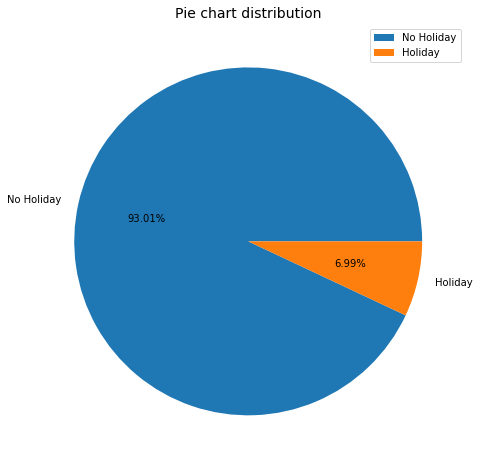

In [27]:
#analyzing holidays percentage  with respected to Holiday_Flag
plt.figure(figsize=(8,8))
plt.pie(data['Holiday_Flag'].value_counts(),labels=['No Holiday','Holiday'],autopct='%0.2f%%')
plt.title("Pie chart distribution",fontsize=14)
plt.legend()
plt.show()

# feature engineering and feature selection

# Encoding the Data


each store has different sales some of th stores are not up to the mark.

by applying pd.get_dummies on Store 

In [32]:

store_col = ['Store']
data_store = data[store_col].copy()
data_store = pd.get_dummies(data_store,columns=store_col)
data_store

,Store_1,Store_2,Store_3,Store_4,Store_5,Store_6,Store_7,Store_8,Store_9,Store_10,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6432,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
data = pd.concat([data, data_store],axis=1)
data=data.drop(columns=['Store'])


In [93]:
list(data.columns)

['Weekly_Sales',
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Year',
 'Month',
 'Week',
 'max',
 'min',
 'mean',
 'median',
 'std',
 'Store_1',
 'Store_2',
 'Store_3',
 'Store_4',
 'Store_5',
 'Store_6',
 'Store_7',
 'Store_8',
 'Store_9',
 'Store_10',
 'Store_11',
 'Store_12',
 'Store_13',
 'Store_14',
 'Store_15',
 'Store_16',
 'Store_17',
 'Store_18',
 'Store_19',
 'Store_20',
 'Store_21',
 'Store_22',
 'Store_23',
 'Store_24',
 'Store_25',
 'Store_26',
 'Store_27',
 'Store_28',
 'Store_29',
 'Store_30',
 'Store_31',
 'Store_32',
 'Store_33',
 'Store_34',
 'Store_35',
 'Store_36',
 'Store_37',
 'Store_38',
 'Store_39',
 'Store_40',
 'Store_41',
 'Store_42',
 'Store_43',
 'Store_44',
 'Store_45']

scaling the data for better output

In [34]:
col=[
 'Weekly_Sales',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'max',
 'min',
 'mean',
 'median',
 'std']

In [35]:
from sklearn.preprocessing import MinMaxScaler

minmax_scale = MinMaxScaler(feature_range=(0, 1))
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
  return df

In [36]:
data = normalization(data.copy(),col)
data.head()


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Week,max,...,Store_36,Store_37,Store_38,Store_39,Store_40,Store_41,Store_42,Store_43,Store_44,Store_45
0,0.020282,0,0.715851,0.065631,0.851675,0.276883,2010,1,1,0.050674,...,0,0,0,0,0,0,0,0,0,0
1,0.098916,0,0.604207,0.184369,0.066155,0.401380,2010,1,1,0.297388,...,0,0,0,0,0,0,0,0,0,0
2,0.075245,0,0.861742,0.265030,0.001686,0.491087,2010,1,1,0.098565,...,0,0,0,0,0,0,1,0,0,0
3,0.003965,0,0.914971,0.265030,0.001686,0.516197,2010,1,1,0.000000,...,0,0,0,0,0,0,0,0,0,0
4,0.058798,0,0.750685,0.047595,0.834016,0.440579,2010,1,1,0.045361,...,1,0,0,0,0,0,0,0,0,0


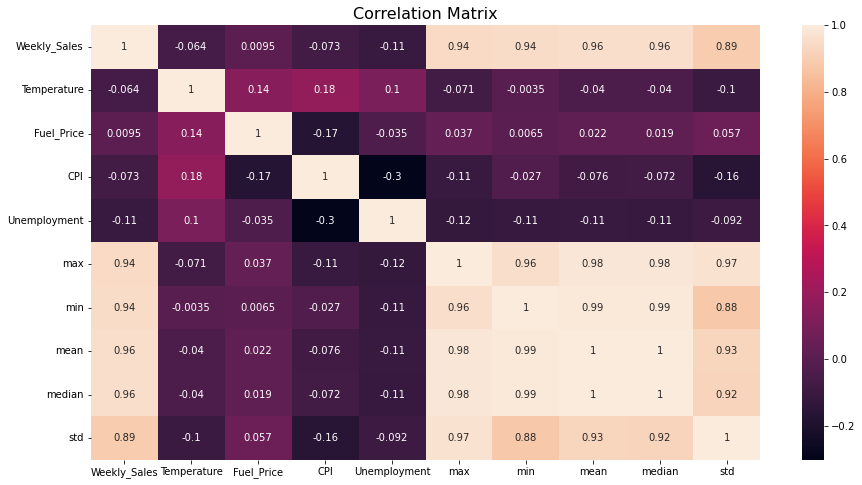

In [38]:
#Correlation between target lable and all aother features
plt.figure(figsize=(15,8))
corr = data[col].corr()
sns.heatmap(corr,vmax=1.0,annot=True)
plt.title('Correlation Matrix',fontsize=16)
plt.show()

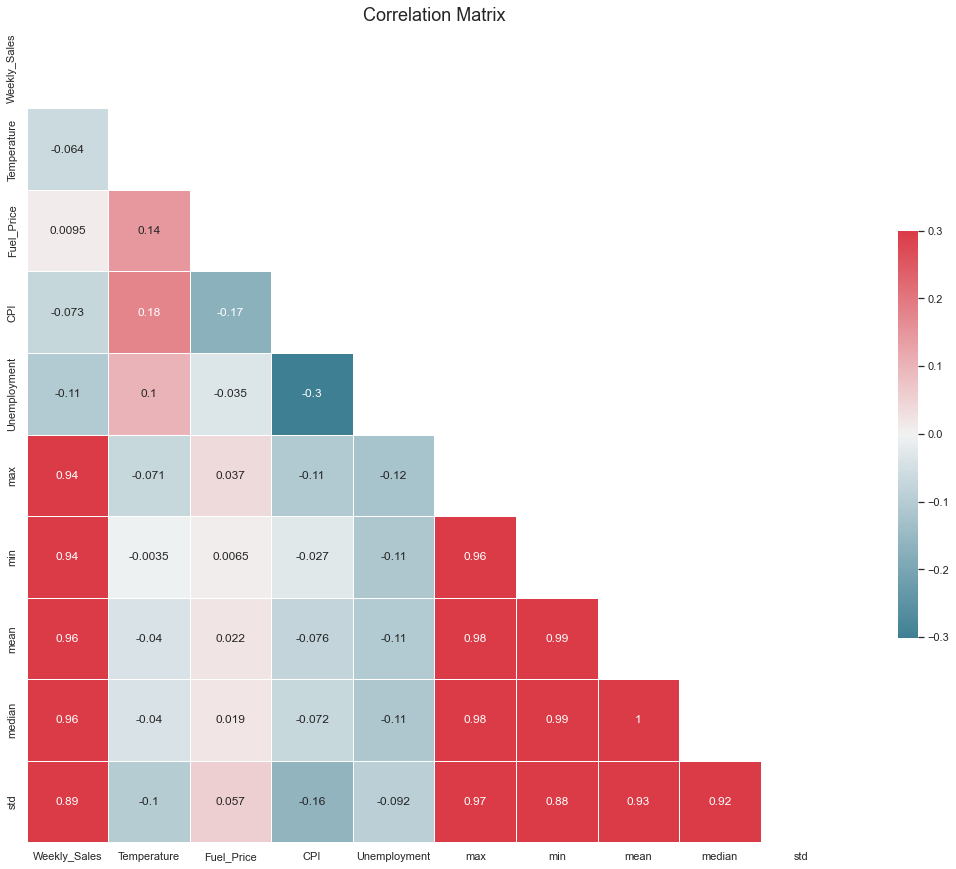

In [98]:
sns.set(style="white")

corr = data[col].corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

all features seems to be important from correlations 

# Model Building AND Model Evaluation  



importing algorithms for prediction

In [48]:
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor



In [49]:
print(f'Number of missing values: {data.isna().sum().sum()}')


Number of missing values: 0


feature selection by feature importance from RandomForestRegressor  

In [50]:
feature_col = data.columns.difference(['Weekly_Sales'])
feature_col

Index(['CPI', 'Fuel_Price', 'Holiday_Flag', 'Month', 'Store_1', 'Store_10',
       'Store_11', 'Store_12', 'Store_13', 'Store_14', 'Store_15', 'Store_16',
       'Store_17', 'Store_18', 'Store_19', 'Store_2', 'Store_20', 'Store_21',
       'Store_22', 'Store_23', 'Store_24', 'Store_25', 'Store_26', 'Store_27',
       'Store_28', 'Store_29', 'Store_3', 'Store_30', 'Store_31', 'Store_32',
       'Store_33', 'Store_34', 'Store_35', 'Store_36', 'Store_37', 'Store_38',
       'Store_39', 'Store_4', 'Store_40', 'Store_41', 'Store_42', 'Store_43',
       'Store_44', 'Store_45', 'Store_5', 'Store_6', 'Store_7', 'Store_8',
       'Store_9', 'Temperature', 'Unemployment', 'Week', 'Year', 'max', 'mean',
       'median', 'min', 'std'],
      dtype='object')

In [51]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=23)
radm_clf.fit(data[feature_col], data['Weekly_Sales'])


RandomForestRegressor(n_estimators=23, oob_score=True)

In [59]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame(columns = ['rank', 'feature', 'importance'])

for f in range(data[feature_col].shape[1]):
    feature_rank.loc[f] = [f+1,
                           data[feature_col].columns[indices[f]],
                           radm_clf.feature_importances_[indices[f]]]

feature_rank.head()
                

,rank,feature,importance
0,1,mean,0.488063
1,2,median,0.281103
2,3,min,0.108325
3,4,Week,0.045954
4,5,max,0.038001


In [53]:
x=feature_rank.loc[0:25,['feature']]
x=x['feature'].tolist()
print(x)

['mean', 'median', 'min', 'Week', 'max', 'Temperature', 'CPI', 'Fuel_Price', 'Unemployment', 'Month', 'Holiday_Flag', 'Year', 'std', 'Store_27', 'Store_32', 'Store_18', 'Store_39', 'Store_25', 'Store_13', 'Store_17', 'Store_41', 'Store_30', 'Store_11', 'Store_35', 'Store_7', 'Store_1']


In [54]:
X = data[x]
Y = data['Weekly_Sales']
X

,mean,median,min,Week,max,Temperature,CPI,Fuel_Price,Unemployment,Month,...,Store_39,Store_25,Store_13,Store_17,Store_41,Store_30,Store_11,Store_35,Store_7,Store_1
0,0.031470,0.028593,0.032624,1,0.050674,0.715851,0.851675,0.065631,0.276883,1,...,0,0,0,0,0,0,0,0,0,0
1,0.196692,0.189968,0.157287,1,0.297388,0.604207,0.066155,0.184369,0.401380,1,...,0,0,0,0,0,0,0,0,0,0
2,0.160483,0.163930,0.141037,1,0.098565,0.861742,0.001686,0.265030,0.491087,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000000,0.000000,0.000000,1,0.000000,0.914971,0.001686,0.265030,0.516197,1,...,0,0,0,0,0,0,0,0,0,0
4,0.061505,0.063255,0.039092,1,0.045361,0.750685,0.834016,0.047595,0.440579,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,0.545652,0.542756,0.503658,50,0.554134,0.405479,0.721467,0.645291,0.221967,12,...,0,0,0,0,1,0,0,0,0,0
6431,0.140374,0.137752,0.102163,50,0.193134,0.443444,0.721467,0.645291,0.188614,12,...,0,0,0,0,0,0,0,0,0,0
6432,0.887298,0.864265,0.913155,50,0.980035,0.764090,0.049861,1.000000,0.293655,12,...,0,0,0,0,0,0,0,0,0,0
6433,0.241831,0.235331,0.224668,50,0.276477,0.448141,0.890107,0.765531,0.327200,12,...,0,1,0,0,0,0,0,0,0,0


In [106]:
data = pd.concat([X,Y],axis=1)
data.head()

,mean,min,median,Week,max,Temperature,CPI,Fuel_Price,Unemployment,Month,...,Store_22,Store_17,Store_31,Store_2,Store_41,Store_36,Store_18,Store_30,Store_34,Weekly_Sales
0,0.031470,0.032624,0.028593,1,0.050674,0.715851,0.851675,0.065631,0.276883,1,...,0,0,0,0,0,0,0,0,0,0.020282
1,0.196692,0.157287,0.189968,1,0.297388,0.604207,0.066155,0.184369,0.401380,1,...,0,0,0,0,0,0,0,0,0,0.098916
2,0.160483,0.141037,0.163930,1,0.098565,0.861742,0.001686,0.265030,0.491087,1,...,0,0,0,0,0,0,0,0,0,0.075245
3,0.000000,0.000000,0.000000,1,0.000000,0.914971,0.001686,0.265030,0.516197,1,...,0,0,0,0,0,0,0,0,0,0.003965
4,0.061505,0.039092,0.063255,1,0.045361,0.750685,0.834016,0.047595,0.440579,1,...,0,0,0,0,0,1,0,0,0,0.058798


Splitting data into train and test data


In [55]:
X = data.drop(['Weekly_Sales'],axis=1)
Y = data.Weekly_Sales
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=50)


In [142]:
X_test

,mean,min,median,Week,max,Temperature,CPI,Fuel_Price,Unemployment,Month,...,Store_20,Store_22,Store_17,Store_31,Store_2,Store_41,Store_36,Store_18,Store_30,Store_34
559,0.000000,0.000000,0.000000,17,0.000000,0.737280,0.003129,0.317134,0.572168,4,...,0,0,0,0,0,0,0,0,0,0
5825,0.953081,0.817704,0.961652,32,1.000000,0.649315,0.642011,0.609719,0.449300,8,...,0,0,0,0,0,0,0,0,0,0
6275,0.202111,0.190280,0.207316,42,0.112937,0.717319,0.876330,0.562124,0.475369,10,...,0,0,0,0,0,0,0,0,0,0
1316,0.706167,0.677121,0.697299,34,0.687138,0.858806,0.860211,0.073647,0.296531,8,...,0,0,0,0,0,0,0,0,0,0
2291,0.096719,0.102886,0.098947,2,0.053959,0.354207,0.840710,0.256012,0.397642,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.153759,0.156464,0.153185,5,0.164631,0.788748,0.876876,0.098697,0.245639,2,...,0,0,0,0,0,0,0,0,0,0
5768,0.023210,0.020580,0.021841,30,0.012920,0.807045,0.046018,0.533567,0.146444,7,...,0,0,0,0,0,0,0,0,0,0
3612,0.077304,0.083483,0.075284,33,0.078800,0.885519,0.918853,0.542084,0.353460,8,...,0,0,0,0,0,0,0,0,0,0
893,0.614802,0.636426,0.616854,23,0.498283,0.903718,0.841137,0.077655,0.404447,6,...,0,0,0,1,0,0,0,0,0,0


# Linear Regression 


In [108]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [109]:
linear_regression_accuracy = lr.score(X_test,y_test)*100
print("Linear Regressor Accuracy - ",linear_regression_accuracy)


Linear Regressor Accuracy -  92.4983850467537


In [110]:
y_pred = lr.predict(X_test)

In [111]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))

MAE 0.02556085944376278
MSE 0.0018727698533583163
RMSE 0.043275511012099165
R2 0.9249943378855228


In [112]:
lr_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
lr_df.head()

,Actual,Predicted
559,0.018261,-0.000289
5825,0.523632,0.499699
6275,0.114704,0.123105
1316,0.343830,0.374025
2291,0.070780,0.053721


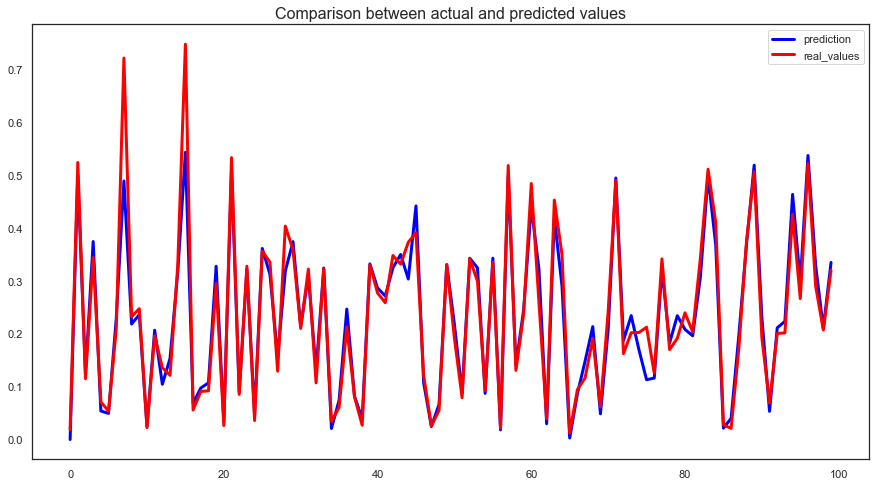

In [113]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(lr.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.show()

# Random Forest 


In [114]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


RandomForestRegressor()

In [115]:
random_forest_accuracy = rf.score(X_test,y_test)*100
print("Random Forest Regressor Accuracy - ",random_forest_accuracy)


Random Forest Regressor Accuracy -  97.68102457312389


In [116]:
y_pred = rf.predict(X_test)

In [117]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))



MAE 0.015386522660715978
MSE 0.0005789296434433659
RMSE 0.024060956827262
R2 0.9768348140113744


In [118]:
rf_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
rf_df.head()

,Actual,Predicted
559,0.018261,0.026038
5825,0.523632,0.483068
6275,0.114704,0.111529
1316,0.343830,0.351582
2291,0.070780,0.070526


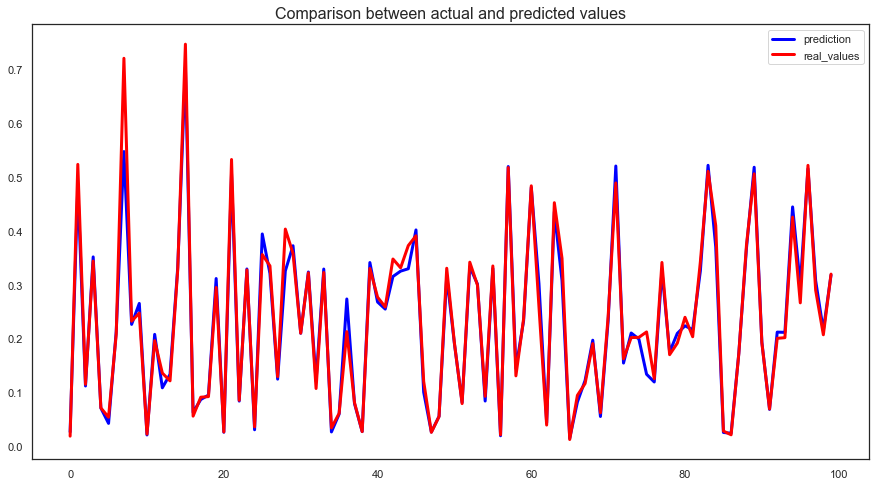

In [119]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(rf.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.show()

# KNeighborsRegressor


In [120]:
knn = KNeighborsRegressor(n_neighbors = 1,weights = 'uniform')
knn.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=1)

In [121]:
knn_accuracy = knn.score(X_test, y_test)*100
print("KNeigbhbors Regressor Accuracy - ",knn_accuracy)


KNeigbhbors Regressor Accuracy -  91.17222214134793


In [122]:
y_pred = knn.predict(X_test)

In [123]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))



MAE 0.03446740201684544
MSE 0.0022038449519024266
RMSE 0.04694512703042166
R2 0.9118827863894049


In [124]:
knn_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
knn_df.head()

,Actual,Predicted
559,0.018261,0.074162
5825,0.523632,0.546582
6275,0.114704,0.094766
1316,0.343830,0.334616
2291,0.070780,0.087464


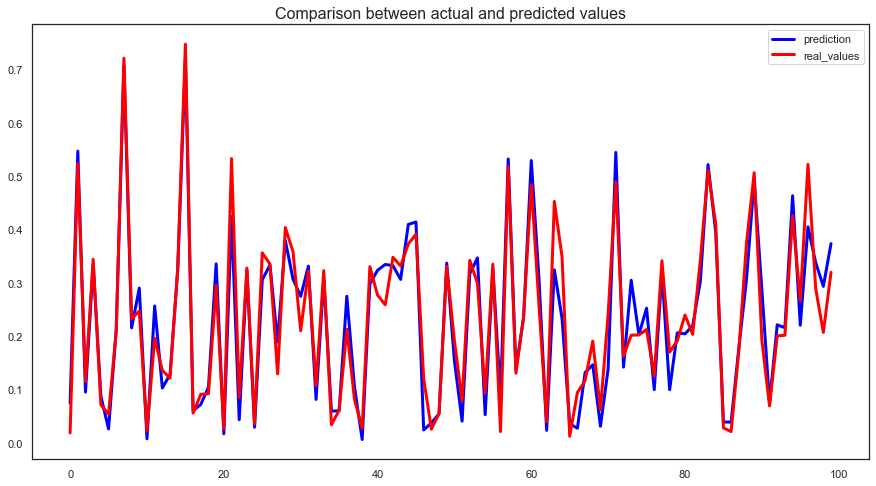

In [125]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(knn.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.show()

# XGBoost Regressor


In [56]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)



XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
xgboost_accuracy = xgbr.score(X_test,y_test)*100
print("XGBoost Regressor Accuracy - ",xgboost_accuracy)

XGBoost Regressor Accuracy -  98.85130543944575


In [58]:
y_pred = xgbr.predict(X_test)
y_pred

array([0.01911613, 0.48858666, 0.10960612, ..., 0.05092697, 0.333617  ,
       0.17850402], dtype=float32)

In [129]:
print("MAE" , metrics.mean_absolute_error(y_test, y_pred))
print("MSE" , metrics.mean_squared_error(y_test, y_pred))
print("RMSE" , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2" , metrics.explained_variance_score(y_test, y_pred))



MAE 0.01153148693889411
MSE 0.00027929383133210874
RMSE 0.016712086384772812
R2 0.9888435137642735


In [130]:
xgb_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
xgb_df.head()

,Actual,Predicted
559,0.018261,0.016547
5825,0.523632,0.485056
6275,0.114704,0.108807
1316,0.343830,0.349398
2291,0.070780,0.060101


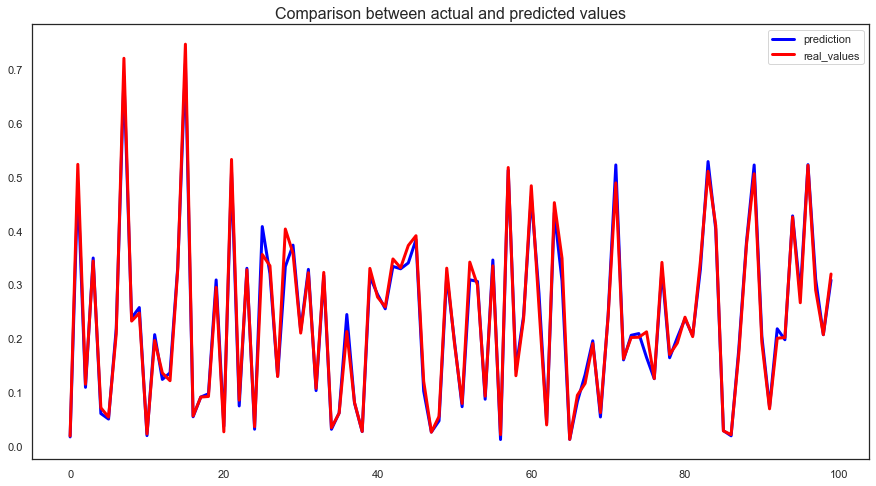

In [133]:
plt.figure(figsize=(15,8))
plt.title('Comparison between actual and predicted values',fontsize=16)
plt.plot(xgbr.predict(X_test[:100]), label="prediction", linewidth=3.0,color='blue')
plt.plot(y_test[:100].values, label="real_values", linewidth=3.0,color='red')
plt.legend(loc="best")
plt.show()

.









Comparing accuracy of models :


In [134]:
acc = {'model':['linear_regression_accuracy','random_forest_accuracy','knn_accuracy','xgboost_accuracy'],'accuracy':[linear_regression_accuracy,random_forest_accuracy,knn_accuracy,xgboost_accuracy]}


In [135]:
acc_df = pd.DataFrame(acc)
acc_df

,model,accuracy
0,linear_regression_accuracy,92.498385
1,random_forest_accuracy,97.681025
2,knn_accuracy,91.172222
3,xgboost_accuracy,98.881253


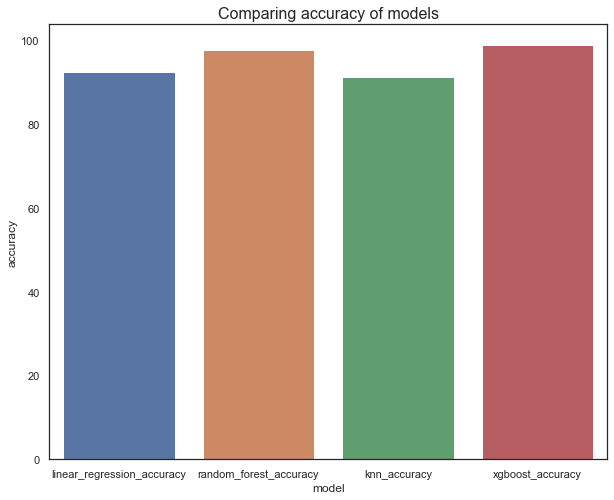

In [136]:
plt.figure(figsize=(10,8))
plt.title('Comparing accuracy of models',fontsize=16)
sns.barplot(x='model',y='accuracy',data=acc_df)
plt.savefig('models_comparison.png')
plt.show()

# Choosing the Algorithms for the Project


Reasons for choosing  LinearRegression,randomforest,KNeighborsRegressor and xgboost are:

1.it is supervised learning .

2.the ouput of  target variable is numerical and continuous.


we choose xgboost as it has better accuracy 

# Assumptions


The following assumptions were made in order to create the  LinearRegression,randomforest,KNeighborsRegressor and xgboost  model for project.
1. assuming there is linear relation between variables

2. the data is normally distributed 

3. the correlation is does not effect model

# Model Evaluation and Technique


The following techniques  were involved in the evaluation of the model
1. Mean Squared Error (MSE).
2. Root Mean Squared Error (RMSE).
3.Mean Absolute Error (MAE)
4.R2


The evaluation report suggests the following:

1.The value of Mean Squared Error for each model is nearly zero it means the model performs better.

2.the higher the R-squared, the better the model fits your data.

3.Lower values of RMSE indicate better fit. RMSE is a good measure of how accurately the model predicts the response.

4.The closer MAE is to 0, the more accurate the model is. 

# Inferences from the Project


The model performanced is  high and it can be used for future  possibilities

# Conclusion

Conclusion With the above implementation it was possible to forecast the prediction for the Walmart Stores